In [15]:
%matplotlib inline
import rasterio
import rasterio.plot
import os
import numpy as np
from osgeo import gdal
from sklearn import preprocessing
import matplotlib.pyplot as plt
import utilidades

In [2]:
os.chdir('D:/Memoria/Codigo/AraucoNursery/')
# os.chdir('/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/')
url_imagen = "PROYECTOS/CONTEO_SATELITE/tif1.tif"

In [3]:
ds = gdal.Open(url_imagen)
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())

In [4]:
unique, counts = np.unique(myarray, return_counts=True)
# print(np.asarray((unique, counts)).T)

[[       0 18038830]
 [       1  6782769]
 [       2 12219499]
 [       3 17976478]
 [       4 35261592]
 [       5  8352245]
 [       6  2145982]
 [       7   291773]
 [       8    25936]]


In [5]:
lista = myarray.ravel()

In [6]:
normalized = (lista-min(lista))/(max(lista)-min(lista))
density_map = np.reshape(normalized, myarray.shape)
density_map[np.isnan(density_map)] = 0

In [7]:
unique, counts = np.unique(density_map, return_counts=True)

In [8]:
print(np.asarray((unique, counts)).T)

[[0.0000000e+00 1.8038830e+07]
 [1.2500000e-01 6.7827690e+06]
 [2.5000000e-01 1.2219499e+07]
 [3.7500000e-01 1.7976478e+07]
 [5.0000000e-01 3.5261592e+07]
 [6.2500000e-01 8.3522450e+06]
 [7.5000000e-01 2.1459820e+06]
 [8.7500000e-01 2.9177300e+05]
 [1.0000000e+00 2.5936000e+04]]


In [9]:
np.sum(density_map)

35385573.125

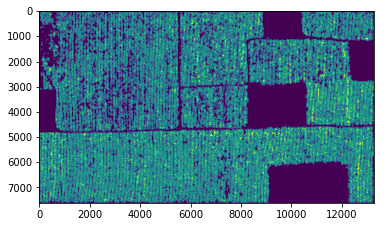

In [13]:
plt.figure()
plt.imshow(density_map)
plt.show()

In [16]:
raster = rasterio.open(url_imagen)

In [18]:
output_file = 'density_map_final_final.shp'
utilidades.array_to_shp(density_map,raster,output_file)